In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(512,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((512, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


from scipy import signal
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [2]:
eyes_closed_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed_jason_8_6.csv", thousands=',')
eyes_open_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open_jason_8_6.csv", thousands=',')


#eyes_open_time_data = (eyes_open_time_data.append(eyes_open_time_data2))[:40000]
#eyes_closed_time_data = (eyes_closed_time_data.append(eyes_closed_time_data2))[:40000]
eyes_open_time_data = eyes_open_time_data
eyes_closed_time_data = eyes_closed_time_data
eyes_open_time_data

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,39cd1853-c299-42dc-b9e2-c0a1cc75087a,-2.617581e-06,327958
1,2,POz,39cd1853-c299-42dc-b9e2-c0a1cc75087a,-8.786714e-06,327958
2,3,PO4,39cd1853-c299-42dc-b9e2-c0a1cc75087a,-3.486351e-06,327958
3,4,O2,39cd1853-c299-42dc-b9e2-c0a1cc75087a,3.130197e-06,327958
4,5,O1,39cd1853-c299-42dc-b9e2-c0a1cc75087a,-1.168994e-05,327958
...,...,...,...,...,...
392443,4,O2,ab00de11-a082-4157-b028-1ed7c42da8a2,-6.377703e-06,523860
392444,5,O1,ab00de11-a082-4157-b028-1ed7c42da8a2,-4.636977e-06,523860
392445,6,Oz,ab00de11-a082-4157-b028-1ed7c42da8a2,2.459712e-06,523860
392446,7,PO3,ab00de11-a082-4157-b028-1ed7c42da8a2,-9.327428e-07,523860


In [3]:
fs = 250.0
lowcut = 7.0
highcut = 13.0

filtered_eyes_open_channel_data = pd.DataFrame([])
channel_group_data = eyes_open_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_open_channel_data = filtered_eyes_open_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_open_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']


filtered_eyes_closed_channel_data = pd.DataFrame([])
channel_group_data2 = eyes_closed_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data2:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_closed_channel_data = filtered_eyes_closed_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_closed_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']

In [4]:
channel_group_data_eyes_open = filtered_eyes_open_channel_data.groupby(['ChannelGroup', 'TimeStamp'])
channel_group_data_eyes_closed = filtered_eyes_closed_channel_data.groupby(['ChannelGroup', 'TimeStamp'])



In [5]:
#remove tuple ranking
period_group_cleaned = [item[1] for item in channel_group_data_eyes_closed]
period_channel_groups = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups = period_channel_groups.append(channel_group_df)
    
#remove tuple ranking
period_group_cleaned2 = [item[1] for item in channel_group_data_eyes_open]
period_channel_groups2 = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned2:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups2 = period_channel_groups2.append(channel_group_df)

period_channel_groups2

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
14960,1,P4,000051d7-e9f4-4a52-bd7f-5b6d0fecac66,-0.000035,387698,-5.805159e-06
14960,2,POz,000051d7-e9f4-4a52-bd7f-5b6d0fecac66,0.000012,387698,-3.552208e-06
14960,3,PO4,000051d7-e9f4-4a52-bd7f-5b6d0fecac66,-0.000024,387698,-8.549022e-06
14960,4,O2,000051d7-e9f4-4a52-bd7f-5b6d0fecac66,-0.000046,387698,-5.171108e-06
14960,5,O1,000051d7-e9f4-4a52-bd7f-5b6d0fecac66,-0.000013,387698,-8.007186e-06
...,...,...,...,...,...,...
42581,4,O2,ffff5acf-0873-4f5d-b230-9b0f4e6f0f64,0.000019,498005,-5.255326e-07
42581,5,O1,ffff5acf-0873-4f5d-b230-9b0f4e6f0f64,-0.000005,498005,-7.458825e-06
42581,6,Oz,ffff5acf-0873-4f5d-b230-9b0f4e6f0f64,-0.000014,498005,-3.057574e-06
42581,7,PO3,ffff5acf-0873-4f5d-b230-9b0f4e6f0f64,-0.000006,498005,-5.988800e-06


In [6]:
period_channel_groups

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
36161,1,P4,000068ff-cca7-4e92-acee-c126c1cbabda,-0.000006,812966,-0.000003
36161,2,POz,000068ff-cca7-4e92-acee-c126c1cbabda,0.000018,812966,0.000009
36161,3,PO4,000068ff-cca7-4e92-acee-c126c1cbabda,-0.000006,812966,0.000001
36161,4,O2,000068ff-cca7-4e92-acee-c126c1cbabda,0.000001,812966,-0.000003
36161,5,O1,000068ff-cca7-4e92-acee-c126c1cbabda,0.000008,812966,0.000008
...,...,...,...,...,...,...
38480,4,O2,ffff96ec-b6bf-491d-af1b-d333dce9225d,0.000013,822228,0.000006
38480,5,O1,ffff96ec-b6bf-491d-af1b-d333dce9225d,0.000016,822228,0.000005
38480,6,Oz,ffff96ec-b6bf-491d-af1b-d333dce9225d,0.00001,822228,-0.000003
38480,7,PO3,ffff96ec-b6bf-491d-af1b-d333dce9225d,0.000014,822228,-0.000003


In [7]:
period_channel_groups_sorted_eyes_closed = period_channel_groups.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_open = period_channel_groups2.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_closed

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-0.000007,668539,-3.581805e-08
0,2,POz,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-0.000001,668539,-3.444418e-09
0,3,PO4,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-0.00001,668539,-5.231769e-08
0,4,O2,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-0.000009,668539,-4.467846e-08
0,5,O1,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-0.000011,668539,-5.649371e-08
...,...,...,...,...,...,...
49714,4,O2,9bccc286-33ca-43ef-bb38-6414aed28e6f,-0.000015,867094,4.740896e-06
49714,5,O1,9bccc286-33ca-43ef-bb38-6414aed28e6f,0.000015,867094,1.666966e-05
49714,6,Oz,9bccc286-33ca-43ef-bb38-6414aed28e6f,0.000013,867094,1.446748e-05
49714,7,PO3,9bccc286-33ca-43ef-bb38-6414aed28e6f,0.000014,867094,1.003491e-05


In [8]:
channels_closed = period_channel_groups_sorted_eyes_closed.groupby(['Channel'])
channels_open = period_channel_groups_sorted_eyes_open.groupby(['Channel'])

In [9]:
channels_closed

In [10]:
channel_1_data_closed = channels_closed.get_group(1)
channel_2_data_closed = channels_closed.get_group(2)
channel_3_data_closed = channels_closed.get_group(3)
channel_4_data_closed = channels_closed.get_group(4)
channel_5_data_closed = channels_closed.get_group(5)
channel_6_data_closed = channels_closed.get_group(6)
channel_7_data_closed = channels_closed.get_group(7)
channel_8_data_closed = channels_closed.get_group(8)

channel_1_data_open = channels_open.get_group(1)
channel_2_data_open = channels_open.get_group(2)
channel_3_data_open = channels_open.get_group(3)
channel_4_data_open = channels_open.get_group(4)
channel_5_data_open = channels_open.get_group(5)
channel_6_data_open = channels_open.get_group(6)
channel_7_data_open = channels_open.get_group(7)
channel_8_data_open = channels_open.get_group(8)

In [11]:
channel_1_data_sorted_closed = channel_1_data_closed.sort_index(0)
channel_2_data_sorted_closed = channel_2_data_closed.sort_index(0)
channel_3_data_sorted_closed = channel_3_data_closed.sort_index(0)
channel_4_data_sorted_closed = channel_4_data_closed.sort_index(0)
channel_5_data_sorted_closed = channel_5_data_closed.sort_index(0)
channel_6_data_sorted_closed = channel_6_data_closed.sort_index(0)
channel_7_data_sorted_closed = channel_7_data_closed.sort_index(0)
channel_8_data_sorted_closed = channel_8_data_closed.sort_index(0)

channel_1_data_sorted_open = channel_1_data_open.sort_index(0)
channel_2_data_sorted_open = channel_2_data_open.sort_index(0)
channel_3_data_sorted_open = channel_3_data_open.sort_index(0)
channel_4_data_sorted_open = channel_4_data_open.sort_index(0)
channel_5_data_sorted_open = channel_5_data_open.sort_index(0)
channel_6_data_sorted_open = channel_6_data_open.sort_index(0)
channel_7_data_sorted_open = channel_7_data_open.sort_index(0)
channel_8_data_sorted_open = channel_8_data_open.sort_index(0)


c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  after removing the cwd from sys.path.
c:\users\mmang\appdat

In [12]:
period_data_eyes_open = []
channel_1_periods_eyes_open = list(grouper(channel_1_data_sorted_open.values, 100))[:-1]
channel_2_periods_eyes_open = list(grouper(channel_2_data_sorted_open.values, 100))[:-1]
channel_3_periods_eyes_open = list(grouper(channel_3_data_sorted_open.values, 100))[:-1]
channel_4_periods_eyes_open = list(grouper(channel_4_data_sorted_open.values, 100))[:-1]
channel_5_periods_eyes_open = list(grouper(channel_5_data_sorted_open.values, 100))[:-1]
channel_6_periods_eyes_open = list(grouper(channel_6_data_sorted_open.values, 100))[:-1]
channel_7_periods_eyes_open = list(grouper(channel_7_data_sorted_open.values, 100))[:-1]
channel_8_periods_eyes_open = list(grouper(channel_8_data_sorted_open.values, 100))[:-1]

channels_periods_eyes_open = [
    channel_1_periods_eyes_open,
    channel_2_periods_eyes_open,
    channel_3_periods_eyes_open,
    channel_4_periods_eyes_open,
    channel_5_periods_eyes_open,
    channel_6_periods_eyes_open,
    channel_7_periods_eyes_open,
    channel_8_periods_eyes_open
]

period_data_eyes_closed = []
channel_1_periods_eyes_closed = list(grouper(channel_1_data_sorted_closed.values, 100))[:-1]
channel_2_periods_eyes_closed = list(grouper(channel_2_data_sorted_closed.values, 100))[:-1]
channel_3_periods_eyes_closed = list(grouper(channel_3_data_sorted_closed.values, 100))[:-1]
channel_4_periods_eyes_closed = list(grouper(channel_4_data_sorted_closed.values, 100))[:-1]
channel_5_periods_eyes_closed = list(grouper(channel_5_data_sorted_closed.values, 100))[:-1]
channel_6_periods_eyes_closed = list(grouper(channel_6_data_sorted_closed.values, 100))[:-1]
channel_7_periods_eyes_closed = list(grouper(channel_7_data_sorted_closed.values, 100))[:-1]
channel_8_periods_eyes_closed = list(grouper(channel_8_data_sorted_closed.values, 100))[:-1]

channels_periods_eyes_closed = [
    channel_1_periods_eyes_closed,
    channel_2_periods_eyes_closed,
    channel_3_periods_eyes_closed,
    channel_4_periods_eyes_closed,
    channel_5_periods_eyes_closed,
    channel_6_periods_eyes_closed,
    channel_7_periods_eyes_closed,
    channel_8_periods_eyes_closed
]



In [13]:
pd.DataFrame(channels_periods_eyes_closed[0][0])

,0,1,2,3,4,5
0,1,P4,ca1f33bb-0aad-4102-b4fb-fd466d00b509,-6.983072e-06,668539,-3.581805e-08
1,1,P4,3cb3994c-cbb9-4fff-b740-11195564b124,-1.518688e-05,668543,-2.096684e-07
2,1,P4,cf36f422-c2e0-468a-84f0-88cf08c4c795,-7.113935e-06,668547,-5.506747e-07
3,1,P4,26d7cf35-f348-459c-8bfe-7847d3345f67,6.210808e-06,668551,-8.706103e-07
4,1,P4,b020430f-db71-44c5-b2ea-f6515be40e53,3.419900e-06,668555,-9.600352e-07
...,...,...,...,...,...,...
95,1,P4,f4add90d-a6e2-4fb0-bad3-3a65e84958fe,6.014046e-06,668919,-6.705051e-06
96,1,P4,92a874e3-4340-41da-8eb9-0231a50e8a05,-9.038409e-08,668923,-7.764416e-06
97,1,P4,9e81eb9f-518f-4a4f-b1e2-33e6e6f559f7,-9.635116e-06,668927,-8.301213e-06
98,1,P4,050b3bab-4043-45fd-a2a0-7dadc3c56ea5,-2.619072e-06,668931,-8.390714e-06


In [14]:
cwt_data_eyes_open = []
cwt_labels_eyes_open = []

cwt_data_eyes_closed = []
cwt_labels_eyes_closed = []

widths = np.linspace(1.0, 15.0, 50);

for index, period in enumerate(channel_1_periods_eyes_closed):
    all_channels_cwt_flattened_closed = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_periods_eyes_closed[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_periods_eyes_closed[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_periods_eyes_closed[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_periods_eyes_closed[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_periods_eyes_closed[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_periods_eyes_closed[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_periods_eyes_closed[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_periods_eyes_closed[7][index])[5]
            
    cwt_1 = signal.cwt(flattened_volts_1, signal.ricker, widths)
    cwt_2 = signal.cwt(flattened_volts_2, signal.ricker, widths)
    cwt_3 = signal.cwt(flattened_volts_3, signal.ricker, widths)
    cwt_4 = signal.cwt(flattened_volts_4, signal.ricker, widths)
    cwt_5 = signal.cwt(flattened_volts_5, signal.ricker, widths)
    cwt_6 = signal.cwt(flattened_volts_6, signal.ricker, widths)
    cwt_7 = signal.cwt(flattened_volts_7, signal.ricker, widths)
    cwt_8 = signal.cwt(flattened_volts_8, signal.ricker, widths)
    
    cwt_1_flattened = cwt_1.flatten()
    cwt_2_flattened = cwt_2.flatten()
    cwt_3_flattened = cwt_3.flatten()
    cwt_4_flattened = cwt_4.flatten()
    cwt_5_flattened = cwt_5.flatten()
    cwt_6_flattened = cwt_6.flatten()
    cwt_7_flattened = cwt_7.flatten()
    cwt_8_flattened = cwt_8.flatten()
    
    all_channels_cwt_flattened_closed = all_channels_cwt_flattened_closed + list(cwt_1_flattened) + list(cwt_2_flattened) + list(cwt_3_flattened) + list(cwt_4_flattened) + list(cwt_5_flattened) + list(cwt_6_flattened) + list(cwt_7_flattened) + list(cwt_8_flattened)
    
    cwt_data_eyes_closed.append(all_channels_cwt_flattened_closed)

In [15]:
for index, period in enumerate(channel_1_periods_eyes_open):
    all_channels_cwt_flattened_open = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_periods_eyes_open[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_periods_eyes_open[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_periods_eyes_open[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_periods_eyes_open[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_periods_eyes_open[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_periods_eyes_open[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_periods_eyes_open[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_periods_eyes_open[7][index])[5]
            
    cwt_1 = signal.cwt(flattened_volts_1, signal.ricker, widths)
    cwt_2 = signal.cwt(flattened_volts_2, signal.ricker, widths)
    cwt_3 = signal.cwt(flattened_volts_3, signal.ricker, widths)
    cwt_4 = signal.cwt(flattened_volts_4, signal.ricker, widths)
    cwt_5 = signal.cwt(flattened_volts_5, signal.ricker, widths)
    cwt_6 = signal.cwt(flattened_volts_6, signal.ricker, widths)
    cwt_7 = signal.cwt(flattened_volts_7, signal.ricker, widths)
    cwt_8 = signal.cwt(flattened_volts_8, signal.ricker, widths)
    
    cwt_1_flattened = cwt_1.flatten()
    cwt_2_flattened = cwt_2.flatten()
    cwt_3_flattened = cwt_3.flatten()
    cwt_4_flattened = cwt_4.flatten()
    cwt_5_flattened = cwt_5.flatten()
    cwt_6_flattened = cwt_6.flatten()
    cwt_7_flattened = cwt_7.flatten()
    cwt_8_flattened = cwt_8.flatten()
    
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_1_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_2_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_3_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_4_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_5_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_6_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_7_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_8_flattened);
    
    cwt_data_eyes_open.append(all_channels_cwt_flattened_open)

In [16]:
len(cwt_data_eyes_open[0])

40000

Saving figure some_cwt_plot


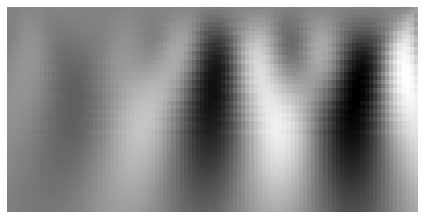

In [17]:
some_cwt = pd.DataFrame(cwt_data_eyes_closed[0][:5000])
some_cwt_image = some_cwt.values.reshape(50, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

Saving figure some_cwt_plot


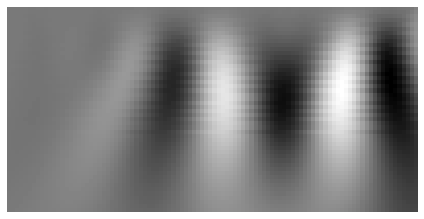

In [18]:
some_cwt = pd.DataFrame(cwt_data_eyes_open[0][:5000])
some_cwt_image = some_cwt.values.reshape(50, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [19]:
eyes_open_labels = []
eyes_closed_labels = []

for cwt_row in cwt_data_eyes_open:
    eyes_open_labels.append(False)
for cwt_row in cwt_data_eyes_closed:
    eyes_closed_labels.append(True)
    
eyes_open_labels = pd.DataFrame(eyes_open_labels)
eyes_closed_labels = pd.DataFrame(eyes_closed_labels)
eyes_open_labels

,0
0,False
1,False
2,False
3,False
4,False
...,...
485,False
486,False
487,False
488,False


In [20]:
cwt_data_eyes_open_df = pd.DataFrame(cwt_data_eyes_open)
cwt_data_eyes_closed_df = pd.DataFrame(cwt_data_eyes_closed)

mock_data = pd.concat([cwt_data_eyes_open_df, cwt_data_eyes_closed_df])
mock_data_labels = pd.concat([eyes_open_labels, eyes_closed_labels])

mock_data

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,1.636833e-08,-6.494554e-08,-2.094452e-07,-2.113877e-07,3.004665e-08,2.575731e-07,2.258376e-07,9.320591e-08,1.063324e-07,1.602541e-07,...,-9.903956e-07,1.643752e-07,0.000001,0.000003,0.000004,0.000005,5.837979e-06,6.800375e-06,7.652433e-06,8.374585e-06
1,2.172250e-06,-4.649133e-07,-1.489937e-06,-1.704326e-06,-1.562541e-06,-1.262709e-06,-1.087584e-06,-9.562695e-07,-6.295817e-07,-2.018609e-07,...,-8.378331e-06,-7.349871e-06,-0.000006,-0.000005,-0.000004,-0.000003,-1.800207e-06,-8.179394e-07,7.057051e-08,8.541834e-07
2,8.898471e-07,4.758318e-06,2.226205e-06,5.521316e-07,1.931236e-07,4.103399e-08,-2.861658e-07,-7.074860e-07,-9.024533e-07,-8.495356e-07,...,-5.132480e-06,-4.493284e-06,-0.000004,-0.000003,-0.000002,-0.000001,-6.322111e-08,8.943099e-07,1.813994e-06,2.671848e-06
3,-1.461241e-06,1.201514e-06,1.409607e-06,1.300426e-06,1.496250e-06,1.712114e-06,1.623775e-06,1.209867e-06,7.501936e-07,3.227306e-07,...,-8.679167e-06,-1.025150e-05,-0.000012,-0.000013,-0.000013,-0.000014,-1.359474e-05,-1.338856e-05,-1.293528e-05,-1.226569e-05
4,-1.358073e-06,-1.003825e-06,2.547819e-07,6.782236e-07,7.772272e-07,9.280771e-07,9.230707e-07,6.991743e-07,5.184229e-07,4.913961e-07,...,-5.816835e-06,-5.554892e-06,-0.000005,-0.000005,-0.000004,-0.000004,-3.100944e-06,-2.428659e-06,-1.726054e-06,-1.010826e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-1.273352e-06,-4.739427e-06,-2.219357e-06,-4.598078e-07,1.692017e-07,5.533384e-07,9.590327e-07,1.366382e-06,1.498450e-06,1.274984e-06,...,1.475070e-05,1.804507e-05,0.000021,0.000024,0.000026,0.000028,2.948266e-05,3.041980e-05,3.084813e-05,3.076913e-05
493,1.249458e-06,2.828050e-06,7.124915e-07,-3.054857e-07,-4.986681e-07,-6.536051e-07,-6.418341e-07,-3.973396e-07,-1.878869e-07,-1.907089e-07,...,-5.199283e-06,-2.128134e-06,0.000001,0.000004,0.000008,0.000011,1.365332e-05,1.630773e-05,1.862634e-05,2.055704e-05
494,-1.736955e-06,-1.151141e-06,3.822167e-08,8.055571e-07,1.236679e-06,1.384738e-06,1.412678e-06,1.432546e-06,1.265243e-06,7.897236e-07,...,6.771951e-06,8.206073e-06,0.000010,0.000011,0.000012,0.000013,1.435464e-05,1.512255e-05,1.567082e-05,1.598278e-05
495,5.311594e-07,7.604811e-06,3.591145e-06,1.224623e-06,8.032199e-07,4.114693e-07,4.604356e-08,-7.762766e-08,-1.031748e-07,-2.602151e-07,...,-2.643844e-05,-2.705847e-05,-0.000027,-0.000027,-0.000026,-0.000024,-2.260940e-05,-2.050264e-05,-1.812951e-05,-1.555943e-05


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mock_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(mock_data_labels, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=52)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=52)

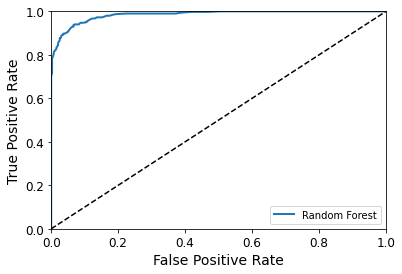

In [22]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

0.9846176092544987

In [24]:
#import joblib

#joblib.dump(forest_clf, "forest_clf_jason_eyes_closed.pkl")

In [208]:
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.fit_transform(test_set)

x_train = np.array(train_set_scaled)
y_train = np.array(train_set_labels)
x_test = np.array(test_set_scaled)
y_test = np.array(test_set_labels)

In [243]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(8),
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

In [ ]:
tf.nn.softmax(predictions).numpy()


In [ ]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5)


In [ ]:
model.evaluate(x_train,  y_train, verbose=2)

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)